In [26]:
def is_start_of_daily_block(date_series):
    """
    Returns a boolean Series indicating if each date in the input Series is the 
    start of a new sequence of consecutive dates.

    :param date_series: Pandas Series with datetime objects.
    :return: Pandas Series of boolean values.
    """
    # Ensure the Series is sorted
    sorted_series = date_series.sort_values()

    # Calculate the difference in days between each date and the previous date
    day_diff = sorted_series.diff().dt.days

    # Mark True where the difference is greater than 1 day, indicating a new sequence
    is_start = day_diff > 1

    # Handle the first element
    if not is_start.empty:
        is_start.iloc[0] = True

    return is_start

In [27]:
import utils

In [28]:
import pandas as pd
import re

extruder = 'EX4'

ex_data = pd.read_csv(f"data/{extruder}_processed.csv")
ex_data['Unnamed: 0'] = pd.to_datetime(ex_data['Unnamed: 0'])
ex_data = ex_data.set_index('Unnamed: 0').rename_axis('Date and Time')
#ex_data.index = pd.to_datetime(ex_data.index)
ex_data.dropna(inplace=True)

In [29]:
type(ex_data.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
min_time = ex_data.index.min()
well_sampled_cutoff = min_time + pd.Timedelta(hours=48)
min_time, well_sampled_cutoff

ex_data.loc[ex_data.index < well_sampled_cutoff,'well_sampled'] = False

In [31]:
ex_data.head()

,Extruder Pressure,Screw Speed Output,Screw Speed,Extruder Die Temp,Extruder Thrust,Feed Screw Current (Amps),Discharge Conveyor Current (Amps),Discharge Conveyor Speed (%),sample_gap_minutes,48H_max_gap_backward,1H_max_gap_forward,well_sampled,HAZARD_CONDITION,hours_to_hazard,hazard_within_24h
Date and Time,,,,,,,,,,,,,,,
2023-07-17 16:06:00,0.000000,6.952558e-310,6.952558e-310,0.000000,0.000000,0.0,0.00,6.952558e-310,0.333333,0.333333,1.316667,False,False,495.166667,False
2023-07-17 16:06:30,0.000000,6.952558e-310,6.952558e-310,0.000000,0.000000,0.0,0.00,6.952558e-310,0.333333,0.333333,1.316667,False,False,495.158333,False
2023-07-17 16:07:00,0.000000,6.952558e-310,6.952558e-310,0.000000,0.000000,0.0,0.00,6.952558e-310,0.333333,0.333333,1.316667,False,False,495.150000,False
2023-07-17 16:07:30,1977.377930,7.500000e+01,-9.425001e-01,9.107727,38.092941,0.0,1.09,7.000000e+01,1.316667,1.316667,1.316667,False,False,495.141667,False
2023-07-17 16:08:00,2045.076172,7.500000e+01,-9.425001e-01,9.107727,38.417480,0.0,1.09,7.000000e+01,0.033333,1.316667,0.066667,False,False,495.133333,False


<Axes: xlabel='Date and Time'>

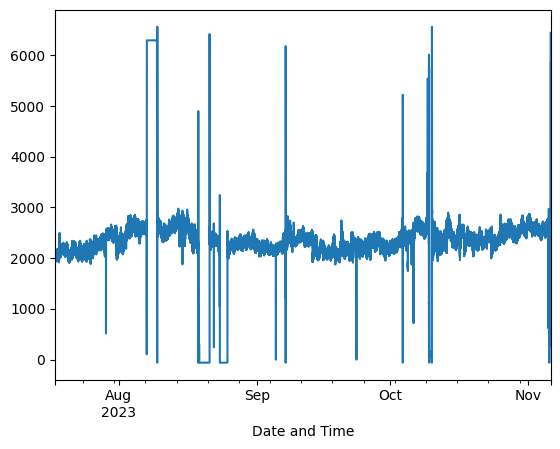

In [51]:
ex_data['Extruder Pressure'].plot()

In [32]:
ex_data.tail()

,Extruder Pressure,Screw Speed Output,Screw Speed,Extruder Die Temp,Extruder Thrust,Feed Screw Current (Amps),Discharge Conveyor Current (Amps),Discharge Conveyor Speed (%),sample_gap_minutes,48H_max_gap_backward,1H_max_gap_forward,well_sampled,HAZARD_CONDITION,hours_to_hazard,hazard_within_24h
Date and Time,,,,,,,,,,,,,,,
2023-11-06 00:24:30,3116.609375,40.0,-0.9425,398.028931,57.885834,6.04,0.98,80.0,0.033333,392.65,0.166667,False,False,0.008333,True
2023-11-06 00:25:00,6450.701172,40.0,-0.9425,398.028931,57.686462,6.04,0.96,80.0,0.050000,392.65,0.166667,False,True,0.000000,True
2023-11-06 00:25:30,4515.465820,40.0,-0.9425,398.028931,57.785995,6.04,1.00,80.0,0.083333,392.65,0.166667,False,False,0.008333,True
2023-11-06 00:26:00,6416.785156,40.0,-0.9425,398.028931,57.416000,6.04,1.00,80.0,0.066667,392.65,0.166667,False,True,0.000000,True
2023-11-06 00:26:30,5846.673828,40.0,-0.9425,398.028931,52.008789,6.04,0.95,80.0,0.166667,392.65,0.166667,False,True,0.000000,True


In [33]:
len(ex_data)

320682

In [34]:
#ex_data['Date and Time'] = ex_data.index

In [35]:
for time_window in ['5T', '15T', '30T', '1H', '3H', '6H', '12H', '24H', '48H']:
    if 'T' in time_window:
        label_append = time_window.replace('T', 'min')
    elif 'H' in time_window:
        label_append = time_window.replace('H', 'hour')

    col_label = 'pressure-' + label_append + '_avg'
    ex_data[col_label] = ex_data['Extruder Pressure'].rolling(time_window).mean()

    col_label = 'pressure-' + label_append + '_var'
    ex_data[col_label] = ex_data['Extruder Pressure'].rolling(time_window).var()

In [36]:
ex_data.columns

Index(['Extruder Pressure', 'Screw Speed Output', 'Screw Speed',
       'Extruder Die Temp', 'Extruder Thrust ', 'Feed Screw Current (Amps)',
       'Discharge Conveyor Current (Amps)', 'Discharge Conveyor Speed (%)',
       'sample_gap_minutes', '48H_max_gap_backward', '1H_max_gap_forward',
       'well_sampled', 'HAZARD_CONDITION', 'hours_to_hazard',
       'hazard_within_24h', 'pressure-5min_avg', 'pressure-5min_var',
       'pressure-15min_avg', 'pressure-15min_var', 'pressure-30min_avg',
       'pressure-30min_var', 'pressure-1hour_avg', 'pressure-1hour_var',
       'pressure-3hour_avg', 'pressure-3hour_var', 'pressure-6hour_avg',
       'pressure-6hour_var', 'pressure-12hour_avg', 'pressure-12hour_var',
       'pressure-24hour_avg', 'pressure-24hour_var', 'pressure-48hour_avg',
       'pressure-48hour_var'],
      dtype='object')

In [37]:
variables_to_lag = ['Extruder Die Temp', 'Extruder Thrust ',
                    'Screw Speed Output']

colname_map = {
    'Extruder Die Temp' : 'die_temp-',
    'Extruder Thrust ' : 'thrust-',
    'Screw Speed Output' : 'screw_speed_output-',
}

for time_window in ['15T', '1H', '3H', '6H']:
    if 'T' in time_window:
        label_append = time_window.replace('T', 'min')
    elif 'H' in time_window:
        label_append = time_window.replace('H', 'hour')
    for lagvar in variables_to_lag:
        col_label = colname_map[lagvar] + label_append + '_avg'
        ex_data[col_label] = \
            ex_data[lagvar].rolling(time_window).mean()

In [38]:
#min_datetime = pauses.min() - pd.Timedelta(days=7)
#max_datetime = pauses.max()#

#time_mask = (ex_data.index >= min_datetime) \
#            & (ex_data.index <= max_datetime)
#ex_data = ex_data[time_mask]#
#
#ex_data = ex_data[redundancy_mask]

In [39]:
target_feature = ['hours_to_hazard']
input_features = [
    'Screw Speed Output',
    'Screw Speed',
    'Extruder Die Temp',
    'Extruder Thrust ',
    'Feed Screw Current (Amps)',
    'Discharge Conveyor Current (Amps)',
    'Discharge Conveyor Speed (%)',
    'pressure-5min_avg',
    'pressure-15min_avg',
    'pressure-30min_avg',
    'pressure-1hour_avg',
    'pressure-3hour_avg',
    'pressure-6hour_avg',
    'pressure-12hour_avg',
    'pressure-24hour_avg',
    'pressure-48hour_avg',
    'pressure-5min_var',
    'pressure-15min_var',
    'pressure-30min_var',
    'pressure-1hour_var',
    'pressure-3hour_var',
    'pressure-6hour_var',
    'pressure-12hour_var',
    'pressure-24hour_var',
    'pressure-48hour_var',
    'die_temp-15min_avg',
    'thrust-15min_avg',
    'die_temp-1hour_avg',
    'thrust-1hour_avg',
    'die_temp-3hour_avg',
    'thrust-3hour_avg',
    'die_temp-6hour_avg',
    'thrust-6hour_avg',
]

In [40]:
ex_data.head()

,Extruder Pressure,Screw Speed Output,Screw Speed,Extruder Die Temp,Extruder Thrust,Feed Screw Current (Amps),Discharge Conveyor Current (Amps),Discharge Conveyor Speed (%),sample_gap_minutes,48H_max_gap_backward,...,screw_speed_output-15min_avg,die_temp-1hour_avg,thrust-1hour_avg,screw_speed_output-1hour_avg,die_temp-3hour_avg,thrust-3hour_avg,screw_speed_output-3hour_avg,die_temp-6hour_avg,thrust-6hour_avg,screw_speed_output-6hour_avg
Date and Time,,,,,,,,,,,,,,,,,,,,,
2023-07-17 16:06:00,0.000000,6.952558e-310,6.952558e-310,0.000000,0.000000,0.0,0.00,6.952558e-310,0.333333,0.333333,...,6.952558e-310,0.000000,0.000000,6.952558e-310,0.000000,0.000000,6.952558e-310,0.000000,0.000000,6.952558e-310
2023-07-17 16:06:30,0.000000,6.952558e-310,6.952558e-310,0.000000,0.000000,0.0,0.00,6.952558e-310,0.333333,0.333333,...,6.952558e-310,0.000000,0.000000,6.952558e-310,0.000000,0.000000,6.952558e-310,0.000000,0.000000,6.952558e-310
2023-07-17 16:07:00,0.000000,6.952558e-310,6.952558e-310,0.000000,0.000000,0.0,0.00,6.952558e-310,0.333333,0.333333,...,6.952558e-310,0.000000,0.000000,6.952558e-310,0.000000,0.000000,6.952558e-310,0.000000,0.000000,6.952558e-310
2023-07-17 16:07:30,1977.377930,7.500000e+01,-9.425001e-01,9.107727,38.092941,0.0,1.09,7.000000e+01,1.316667,1.316667,...,1.875000e+01,2.276932,9.523235,1.875000e+01,2.276932,9.523235,1.875000e+01,2.276932,9.523235,1.875000e+01
2023-07-17 16:08:00,2045.076172,7.500000e+01,-9.425001e-01,9.107727,38.417480,0.0,1.09,7.000000e+01,0.033333,1.316667,...,3.000000e+01,3.643091,15.302084,3.000000e+01,3.643091,15.302084,3.000000e+01,3.643091,15.302084,3.000000e+01


In [41]:
ex_data.index.min(),  ex_data.index.max()

(Timestamp('2023-07-17 16:06:00'), Timestamp('2023-11-06 00:26:30'))

In [42]:
ex_data.head().T

Date and Time,2023-07-17 16:06:00,2023-07-17 16:06:30,2023-07-17 16:07:00,2023-07-17 16:07:30,2023-07-17 16:08:00
Extruder Pressure,0.0,0.0,0.0,1977.37793,2045.076172
Screw Speed Output,0.0,0.0,0.0,75.0,75.0
Screw Speed,0.0,0.0,0.0,-0.9425,-0.9425
Extruder Die Temp,0.0,0.0,0.0,9.107727,9.107727
Extruder Thrust,0.0,0.0,0.0,38.092941,38.41748
Feed Screw Current (Amps),0.0,0.0,0.0,0.0,0.0
Discharge Conveyor Current (Amps),0.0,0.0,0.0,1.09,1.09
Discharge Conveyor Speed (%),0.0,0.0,0.0,70.0,70.0
sample_gap_minutes,0.333333,0.333333,0.333333,1.316667,0.033333
48H_max_gap_backward,0.333333,0.333333,0.333333,1.316667,1.316667


In [43]:
well_sampled_data = ex_data[ex_data['well_sampled'] == True]

model_input = well_sampled_data[well_sampled_data['hours_to_hazard'] <= 30][input_features]
model_output = well_sampled_data[well_sampled_data['hours_to_hazard'] <= 30][target_feature]

In [44]:
model_output

,hours_to_hazard
Date and Time,
2023-08-06 01:16:00,30.000000
2023-08-06 01:16:30,29.991667
2023-08-06 01:17:00,29.983333
2023-08-06 01:17:30,29.975000
2023-08-06 01:18:00,29.966667
...,...
2023-11-05 13:38:00,10.783333
2023-11-05 13:38:30,10.775000
2023-11-05 13:39:00,10.766667


In [45]:
model_input

,Screw Speed Output,Screw Speed,Extruder Die Temp,Extruder Thrust,Feed Screw Current (Amps),Discharge Conveyor Current (Amps),Discharge Conveyor Speed (%),pressure-5min_avg,pressure-15min_avg,pressure-30min_avg,...,pressure-24hour_var,pressure-48hour_var,die_temp-15min_avg,thrust-15min_avg,die_temp-1hour_avg,thrust-1hour_avg,die_temp-3hour_avg,thrust-3hour_avg,die_temp-6hour_avg,thrust-6hour_avg
Date and Time,,,,,,,,,,,,,,,,,,,,,
2023-08-06 01:16:00,35.0,-0.9425,7.291687,47.969101,5.26,0.87,80.0,2529.204102,2537.861556,2539.974805,...,9807.448685,9773.593619,7.291687,47.636623,7.291687,47.568345,7.313087,47.621854,7.381000,47.630470
2023-08-06 01:16:30,35.0,-0.9425,7.291687,47.254959,5.26,0.87,80.0,2526.182031,2538.003776,2539.831250,...,9807.469835,9773.797543,7.291687,47.622280,7.291687,47.572268,7.312651,47.620977,7.380782,47.631137
2023-08-06 01:17:00,35.0,-0.9425,7.291687,47.192612,5.26,0.87,80.0,2525.915918,2537.253809,2538.941764,...,9806.042452,9774.644506,7.291687,47.585435,7.291687,47.574073,7.312214,47.620156,7.380564,47.631697
2023-08-06 01:17:30,35.0,-0.9425,7.291687,47.623459,5.26,0.87,80.0,2530.206445,2537.398633,2539.084294,...,9801.765372,9774.918992,7.291687,47.593757,7.291687,47.577042,7.311777,47.620741,7.380345,47.633002
2023-08-06 01:18:00,35.0,-0.9425,7.291687,47.870728,5.26,0.87,80.0,2534.619629,2535.532845,2539.426058,...,9798.802128,9774.344976,7.291687,47.606958,7.291687,47.582690,7.311340,47.620882,7.380127,47.634298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-05 13:38:00,40.0,-0.9425,8.943604,5.352921,0.00,0.92,80.0,1285.307422,2040.730436,2261.684245,...,47992.746059,26201.688507,8.943604,39.756757,8.943604,48.634299,8.943604,50.042240,8.929070,49.395694
2023-11-05 13:38:30,40.0,-0.9425,8.943604,5.352921,0.00,0.92,80.0,1087.731836,1986.808626,2235.984277,...,48871.382441,26644.115015,8.943604,38.179950,8.943604,48.255371,8.943604,49.937853,8.929629,49.328506
2023-11-05 13:39:00,40.0,-0.9425,8.943604,5.352921,0.00,0.92,80.0,985.086133,1931.155371,2210.921842,...,49750.273026,27086.337269,8.943604,36.595721,8.943604,47.871815,8.943604,49.820820,8.930188,49.260796


In [46]:
model_input

,Screw Speed Output,Screw Speed,Extruder Die Temp,Extruder Thrust,Feed Screw Current (Amps),Discharge Conveyor Current (Amps),Discharge Conveyor Speed (%),pressure-5min_avg,pressure-15min_avg,pressure-30min_avg,...,pressure-24hour_var,pressure-48hour_var,die_temp-15min_avg,thrust-15min_avg,die_temp-1hour_avg,thrust-1hour_avg,die_temp-3hour_avg,thrust-3hour_avg,die_temp-6hour_avg,thrust-6hour_avg
Date and Time,,,,,,,,,,,,,,,,,,,,,
2023-08-06 01:16:00,35.0,-0.9425,7.291687,47.969101,5.26,0.87,80.0,2529.204102,2537.861556,2539.974805,...,9807.448685,9773.593619,7.291687,47.636623,7.291687,47.568345,7.313087,47.621854,7.381000,47.630470
2023-08-06 01:16:30,35.0,-0.9425,7.291687,47.254959,5.26,0.87,80.0,2526.182031,2538.003776,2539.831250,...,9807.469835,9773.797543,7.291687,47.622280,7.291687,47.572268,7.312651,47.620977,7.380782,47.631137
2023-08-06 01:17:00,35.0,-0.9425,7.291687,47.192612,5.26,0.87,80.0,2525.915918,2537.253809,2538.941764,...,9806.042452,9774.644506,7.291687,47.585435,7.291687,47.574073,7.312214,47.620156,7.380564,47.631697
2023-08-06 01:17:30,35.0,-0.9425,7.291687,47.623459,5.26,0.87,80.0,2530.206445,2537.398633,2539.084294,...,9801.765372,9774.918992,7.291687,47.593757,7.291687,47.577042,7.311777,47.620741,7.380345,47.633002
2023-08-06 01:18:00,35.0,-0.9425,7.291687,47.870728,5.26,0.87,80.0,2534.619629,2535.532845,2539.426058,...,9798.802128,9774.344976,7.291687,47.606958,7.291687,47.582690,7.311340,47.620882,7.380127,47.634298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-05 13:38:00,40.0,-0.9425,8.943604,5.352921,0.00,0.92,80.0,1285.307422,2040.730436,2261.684245,...,47992.746059,26201.688507,8.943604,39.756757,8.943604,48.634299,8.943604,50.042240,8.929070,49.395694
2023-11-05 13:38:30,40.0,-0.9425,8.943604,5.352921,0.00,0.92,80.0,1087.731836,1986.808626,2235.984277,...,48871.382441,26644.115015,8.943604,38.179950,8.943604,48.255371,8.943604,49.937853,8.929629,49.328506
2023-11-05 13:39:00,40.0,-0.9425,8.943604,5.352921,0.00,0.92,80.0,985.086133,1931.155371,2210.921842,...,49750.273026,27086.337269,8.943604,36.595721,8.943604,47.871815,8.943604,49.820820,8.930188,49.260796


In [47]:
(well_sampled_data[target_feature] <= 30).sum()

hours_to_hazard    13918
dtype: int64

In [48]:
train_split_cutoff = pd.to_datetime('12/1/2023')
model_input_train = model_input[model_input.index < train_split_cutoff]
model_input_test = model_input[model_input.index >= train_split_cutoff]

model_output_train = model_output[model_output.index < train_split_cutoff]
model_output_test = model_output[model_output.index >= train_split_cutoff]

In [49]:
model_input_test

,Screw Speed Output,Screw Speed,Extruder Die Temp,Extruder Thrust,Feed Screw Current (Amps),Discharge Conveyor Current (Amps),Discharge Conveyor Speed (%),pressure-5min_avg,pressure-15min_avg,pressure-30min_avg,...,pressure-24hour_var,pressure-48hour_var,die_temp-15min_avg,thrust-15min_avg,die_temp-1hour_avg,thrust-1hour_avg,die_temp-3hour_avg,thrust-3hour_avg,die_temp-6hour_avg,thrust-6hour_avg
Date and Time,,,,,,,,,,,,,,,,,,,,,


In [50]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import seaborn as sns
import matplotlib.pyplot as plt

import time
import pickle

print('input variables:')
for var in model_input.columns:
    print(var)

print('here first')
# Define the models to test
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(16, 32), max_iter=1000)
}

print('here')

# Dictionary to hold the results
results = {}
output_models = {}

saved_processed_data = {}

# Iterate over the models, fit, and evaluate them
start_time = time.time()
results = dict()

targ = 'hours_to_hazard'

results[targ] = dict()
output_models[targ] = dict()
#y = model_output[targ].values

X_train = model_input_train[model_output_train[targ].notnull()].values
X_test = model_input_test[model_output_test[targ].notnull()].values

Y_train = model_output_train[model_output_train[targ].notnull()][targ].values
Y_test = model_output_test[model_output_test[targ].notnull()][targ].values

# Split the data into training and testing sets
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#n_true = np.sum((Y_train == 1))
#n_false = np.sum((Y_train == 0))

#print(f'balanced true samples: {n_true}, balanced false samples: {n_false}')
for name, model in models.items():
    print()
    print(f"Current Time: {time.strftime('%H:%M:%S', time.localtime())}")
    print(f'results for target: {targ}, model: {name}')
    model.fit(X_train, Y_train)
    output_models[targ][name] = model

    predictions = model.predict(X_test)
    
    plt.scatter(Y_test, predictions)
    plt.title(f'{name}')
    plt.show()
    
    print(f'average prediction:  {np.mean(predictions)}, std: {np.std(predictions)}')
    print(f'min prediction:  {np.min(predictions)}, max prediction: {np.max(predictions)}')
    
    mse = mean_squared_error(Y_test, predictions)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    
    results[targ][name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

    print(results[targ][name])
    print('--------------------------------------')

    duration = time.time() - start_time
    print(f"Run time: {duration / 60:.2f} minutes")
    print(f"Current Time: {time.strftime('%H:%M:%S', time.localtime())}")
    print('--------------------------------------')

input variables:
Screw Speed Output
Screw Speed
Extruder Die Temp
Extruder Thrust 
Feed Screw Current (Amps)
Discharge Conveyor Current (Amps)
Discharge Conveyor Speed (%)
pressure-5min_avg
pressure-15min_avg
pressure-30min_avg
pressure-1hour_avg
pressure-3hour_avg
pressure-6hour_avg
pressure-12hour_avg
pressure-24hour_avg
pressure-48hour_avg
pressure-5min_var
pressure-15min_var
pressure-30min_var
pressure-1hour_var
pressure-3hour_var
pressure-6hour_var
pressure-12hour_var
pressure-24hour_var
pressure-48hour_var
die_temp-15min_avg
thrust-15min_avg
die_temp-1hour_avg
thrust-1hour_avg
die_temp-3hour_avg
thrust-3hour_avg
die_temp-6hour_avg
thrust-6hour_avg
here first
here

Current Time: 14:14:59
results for target: hours_to_hazard, model: Linear Regression


ValueError: Found array with 0 sample(s) (shape=(0, 33)) while a minimum of 1 is required by LinearRegression.

In [ ]:
Y_train

In [ ]:
with open('models/regression_models_no_screw_speed_{extruder}.pkl', 'wb') as f:
    pickle.dump((output_models, results), f)

In [ ]:
target_features = ['hours_to_next_pause']
input_features = [
    'Screw Speed Output',
    'Screw Speed',
    'Extruder Die Temp',
    'Extruder Thrust',
    'Feed Screw Current (Amps)',
    'Discharge Conveyor Current (Amps)',
    'Discharge Conveyor Speed (%)',
    'pressure-15min_avg',
    'pressure-30min_avg',
    'pressure-1hour_avg',
    'pressure-3hour_avg',
    'pressure-6hour_avg',
    'pressure-12hour_avg',
    'pressure-24hour_avg',
    'pressure-48hour_avg',
    'pressure-5min_var',
    'pressure-15min_var',
    'pressure-30min_var',
    'pressure-1hour_var',
    'pressure-3hour_var',
    'pressure-6hour_var',
    'pressure-12hour_var',
    'pressure-24hour_var',
    'pressure-48hour_var',
    'die_temp-15min_avg',
    'thrust-15min_avg',
    'screw_speed_output-15min_avg',
    'die_temp-1hour_avg',
    'thrust-1hour_avg',
    'screw_speed_output-1hour_avg',
    'die_temp-3hour_avg',
    'thrust-3hour_avg',
    'screw_speed_output-3hour_avg',
]

In [ ]:
model_input = ex_data[ex_data['hours_to_next_pause'] <= 6][input_features]
model_output = ex_data[ex_data['hours_to_next_pause'] <= 6][target_features]

In [ ]:
train_split_cutoff = pd.to_datetime('04/01/2023')
model_input_train = model_input[model_input.index < train_split_cutoff]
model_input_test = model_input[model_input.index >= train_split_cutoff]

model_output_train = model_output[model_output.index < train_split_cutoff]
model_output_test = model_output[model_output.index >= train_split_cutoff]

In [ ]:
print('input variables:')
for var in model_input.columns:
    print(var)

# Define the models to test
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(16, 32), max_iter=1000)
}

# Dictionary to hold the results
results = {}
output_models = {}

saved_processed_data = {}

# Iterate over the models, fit, and evaluate them
start_time = time.time()
results = dict()

targ = 'hours_to_next_pause'

results[targ] = dict()
output_models[targ] = dict()
#y = model_output[targ].values

X_train = model_input_train[model_output_train[targ].notnull()].values
X_test = model_input_test[model_output_test[targ].notnull()].values

Y_train = model_output_train[model_output_train[targ].notnull()][targ].values
Y_test = model_output_test[model_output_test[targ].notnull()][targ].values

# Split the data into training and testing sets
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_true = np.sum((Y_train == 1))
n_false = np.sum((Y_train == 0))

print(f'balanced true samples: {n_true}, balanced false samples: {n_false}')
for name, model in models.items():
    print()
    print(f"Current Time: {time.strftime('%H:%M:%S', time.localtime())}")
    print(f'results for target: {targ}, model: {name}')
    model.fit(X_train, Y_train)
    output_models[targ][name] = model

    predictions = model.predict(X_test)
    
    plt.scatter(Y_test, predictions)
    plt.title(f'{name}')
    plt.show()
    
    print(f'average prediction:  {np.mean(predictions)}, std: {np.std(predictions)}')
    print(f'min prediction:  {np.min(predictions)}, max prediction: {np.max(predictions)}')

    mse = mean_squared_error(Y_test, predictions)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)

    results[targ][name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

    print(results[targ][name])
    print('--------------------------------------')

    duration = time.time() - start_time
    print(f"Run time: {duration / 60:.2f} minutes")
    print(f"Current Time: {time.strftime('%H:%M:%S', time.localtime())}")
    print('--------------------------------------')

In [ ]:
with open(f'models/regression_models_with_screw_speed_no_5T_{extruder}.pkl', 'wb') as f:
    pickle.dump((output_models, results), f)

In [ ]:
def clean_extruder_data_old(extruder_data):
    
    extruder_data = extruder_data.drop(extruder_data.index[0])
    extruder_data = extruder_data.replace("<null>", None)
    
    extruder_data = extruder_data.dropna()

    # Convert the column to string type
    for column in extruder_data.columns:
        if column not in ["Date and Time", "AnomalyScore"]:
            extruder_data[column] = extruder_data[column].astype(str)
            #extruder_data[column] = extruder_data[column].str.replace("<null>", None)
            # Replace commas with an empty string
            extruder_data[column] = extruder_data[column].str.replace(",", "")

            # Convert the column back to numeric type, handling any conversion errors
            extruder_data[column] = pd.to_numeric(extruder_data[column], errors="coerce")
            
    extruder_data = extruder_data[(extruder_data['Extruder Pressure'] >= 0) & \
                              (extruder_data['Extruder Pressure'] < 50000)]

    extruder_data['Date and Time'] = pd.to_datetime(extruder_data['Date and Time'])
    
    return extruder_data